In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
(x, y), (_, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Split trainning set by (70%) and temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Then, split the temp set into validation (50%) and test (50%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_val.shape}")
print(f"the shape of the cross validation set (target) is: {y_val.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (42000, 28, 28)
the shape of the training set (target) is: (42000,)

the shape of the cross validation set (input) is: (9000, 28, 28)
the shape of the cross validation set (target) is: (9000,)

the shape of the test set (input) is: (9000, 28, 28)
the shape of the test set (target) is: (9000,)


In [6]:
# Reshape dataset based on keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(42000, 28, 28, 1)


In [ ]:
# One hot encoding label
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print('Original y ', y_train[0])
print('y after one-hot encoding ',y_train[0])

Original y  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y after one-hot encoding  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [
    Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_val, y_val),
batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 2/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0487 - val_accuracy: 0.9874
Epoch 3/10
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0475 - val_accuracy: 0.9888
Epoch 4/10
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0416 - val_accuracy: 0.9907
Epoch 5/10
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0446 - val_accuracy: 0.9887
Epoch 6/10
1313/1313 [==============================] - 45s 34ms/step - loss: 5.0649e-04 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9900
Epoch 7/10
1313/1313 [==============================] - 44s 34ms/step - loss: 2.5502e-04 - accuracy: 1.0000 - val_loss: 

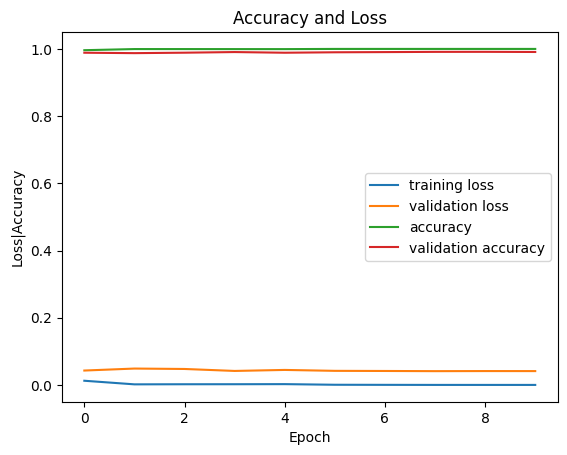

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(x_test, y_test,batch_size=32, verbose=0)
print('Loss: , Accuracy: ',score)

Loss: , Accuracy:  [0.04135167971253395, 0.9897778034210205]


1/1 [==============================] - 0s 23ms/step
Predicted number  7


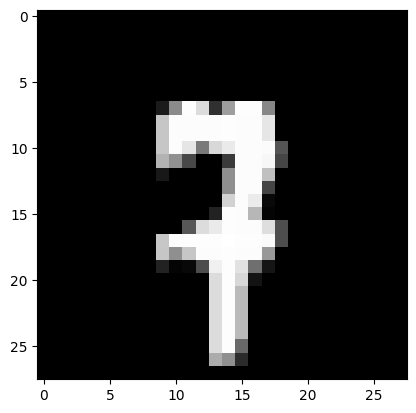

In [ ]:
# Predict single images
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
y_predict = model.predict(x_test[0].reshape(1,28,28,1))
print('Predicted number ', np.argmax(y_predict))

In [ ]:
# Predict all images
y_predict = model.predict(x_test)


282/282 [==============================] - 3s 9ms/step


In [ ]:
y_predict_bin = np.where(y_predict > 0.5, 1., 0.)


In [ ]:
# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_predict_bin,average='micro')
recall = recall_score(y_test, y_predict_bin,average='micro')
f1 = f1_score(y_test, y_predict_bin,average='micro')

# Display the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9904412581971769
Recall: 0.9901111111111112
F1 Score: 0.9902761571373008
